In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data = pd.DataFrame(data.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}))

In [5]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.shape

(1599, 12)

In [7]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
corr_mat = data.corr()

In [10]:
corr_mat["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

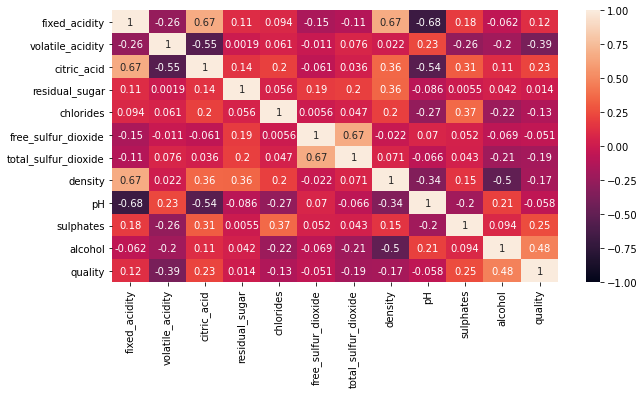

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_mat, annot=True, linewidths=0, vmin=-1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13CDB958>,
      dtype=object)

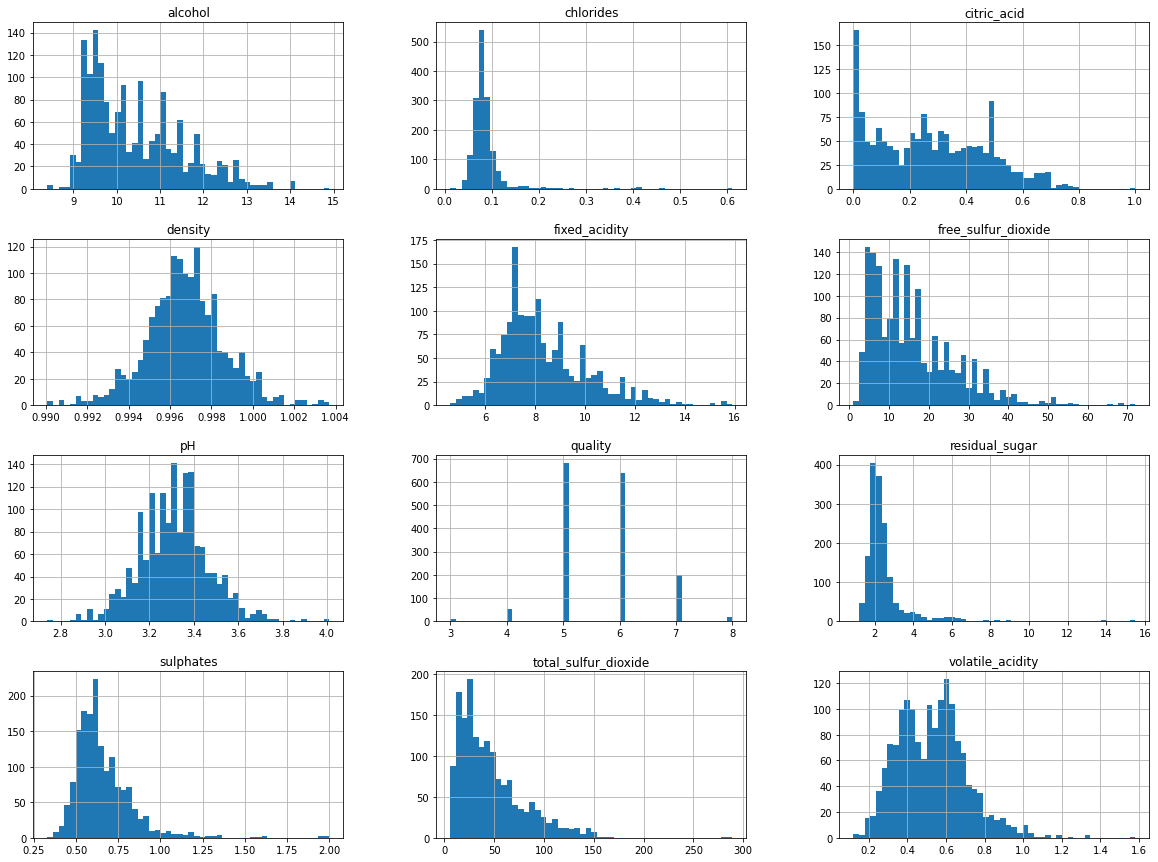

In [12]:
data.hist(bins=50, figsize=(20,15))

In [13]:
from pandas.plotting import scatter_matrix

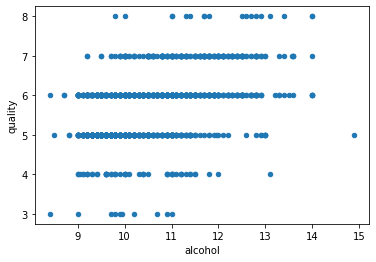

In [14]:
data.plot(x="alcohol", y="quality", kind="scatter")

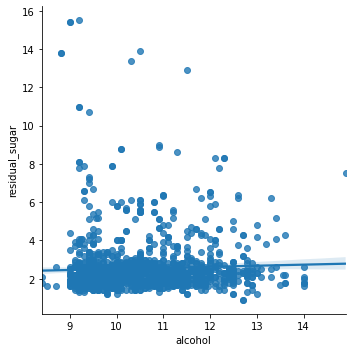

In [15]:
sns.lmplot(x="alcohol", y="residual_sugar", data=data)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [18]:
len(train_set)

1279

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [21]:
for train_index, test_index in split.split(data, data["alcohol"].astype(int)):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [22]:
data = strat_train_set.drop("quality", axis=1)

In [23]:
data_labels = strat_train_set["quality"].copy()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('standaradscalar', StandardScaler())
])

In [25]:
data_new = my_pipeline.fit_transform(data)

In [26]:
data_new

array([[ 1.15252023, -1.0324729 ,  1.27082913, ..., -0.82973678,
        -0.11404907, -0.96218565],
       [-1.11412258, -0.81009546, -0.68821798, ...,  0.84789847,
        -0.05639344,  0.6363475 ],
       [-0.35857498, -0.7545011 , -0.79132572, ..., -0.95878565,
        -0.97888366, -0.96218565],
       ...,
       [-0.30045593,  0.57976355,  1.06461364, ..., -0.76521235,
        -0.22936035, -0.86815429],
       [ 0.45509167, -0.69890674,  1.16772138, ..., -0.63616348,
         0.17422912,  1.95278656],
       [-0.24233688, -0.53212366, -0.32734088, ..., -0.89426121,
         1.44265318, -0.86815429]])

In [27]:
data_new.shape

(1279, 11)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(data_new, data_labels)

RandomForestRegressor()

In [30]:
a_data = data.iloc[:5]
a_data_labels = data_labels.iloc[:5].copy()

In [31]:
a_prepare = my_pipeline.transform(a_data)

In [32]:
model.predict(a_prepare)

array([5.25, 6.13, 5.13, 5.79, 6.27])

In [33]:
list(a_data_labels)

[5, 6, 5, 6, 6]

In [34]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(data_new)
mse = mean_squared_error(data_labels, prediction)
rmse = np.sqrt(mse)

In [35]:
rmse

0.2121814173536672

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
score = cross_val_score(model, data_new, data_labels, scoring="neg_mean_squared_error")
rmse = np.sqrt(-score)

In [38]:
rmse

array([0.60485891, 0.63550669, 0.52306451, 0.499832  , 0.5877808 ])

In [39]:
def pri(score):
    print(f"Score: {score}\n mean: {score.mean()}\n std: {score.std()}")

In [40]:
pri(rmse)

Score: [0.60485891 0.63550669 0.52306451 0.499832   0.5877808 ]
 mean: 0.570208582934388
 std: 0.05088948172184435


DecissionTree
mean: 0.7882666407227086
std: 0.06382645116904344

LinearRegression 
 mean: 0.6376884415071903
 std: 0.03985989975677388

RandomForest
mean: 0.5710457516182011
 std: 0.05186797897187851

# So RandomForest much appreciable

Testing

In [41]:
data_test = strat_test_set.drop("quality", axis=1)
data_test_label = strat_test_set["quality"].copy()

In [42]:
prepared_data = my_pipeline.transform(data_test)
predict_data = model.predict(prepared_data).astype(int)

In [43]:
final_mse = mean_squared_error(data_test_label, predict_data)
final_rmse = np.sqrt(final_mse)

In [44]:
final_rmse

0.8569568250501305

In [45]:
predict = np.array([[ 1.15252023, -1.0324729 ,  1.27082913, 1.36, 5.6, 8.9, 4.36, 9.23, -0.82973678,
        -0.11404907, -0.96218565]])
model.predict(predict)

array([5.21])